In [1]:
import tensorflow as tf
print (tf.__version__)
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


2.15.0


In [2]:
# from google.colab import drive
# drive.mount('/content/drive')
import sys
sys.path.insert(1,'/wsu/home/gy/gy40/gy4065/hm.jetscapeml.source')
sys.path.insert(1,'/content/drive/My Drive/Projects/110_JetscapeMl/hm.jetscapeml.source')
sys.path.insert(1,'/g/My Drive/Projects/110_JetscapeMl/hm.jetscapeml.source')
sys.path.insert(1,'G:\\My Drive\\Projects\\110_JetscapeMl\\hm.jetscapeml.source')

In [3]:
print('Loading/Installing Package => Begin\n\n')
import jet_ml_dataset_builder.jet_ml_dataset_builder_utilities as util
from jet_ml_dataset_builder.jet_ml_dataset_builder_utilities import set_directory_paths
from jet_ml_dataset_builder.jet_ml_dataset_builder_utilities import parse_parameters
from jet_ml_dataset_builder.jet_ml_dataset_builder_utilities import load_dataset
from jet_ml_dataset_builder.jet_ml_dataset_builder_utilities import install
# install("trimesh")
import os
from time import time
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint, History
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import json


tf.random.set_seed(1234)
print('\nLoading/Installing Package => End\n\n')

Loading/Installing Package => Begin



Loading/Installing Package => End




In [4]:
print('\n########################################################################')
print('Checking the running platforms\n')

# Call the function and retrieve the dataset_directory_path and simulation_directory_path
dataset_directory_path, simulation_directory_path = set_directory_paths()

# Access the dataset_directory_path and simulation_directory_path
print("Dataset Directory Path:", dataset_directory_path)
print("Simulation Directory Path:", simulation_directory_path)
print('########################################################################\n')


########################################################################
Checking the running platforms

Python version: 3.11.5
OS: Windows
OS version: 10
running on Colab: False
Dataset Directory Path: G:\My Drive\Projects\110_JetscapeMl\hm.jetscapeml.data\
Simulation Results Path: G:\My Drive\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\
Dataset Directory Path: G:\My Drive\Projects\110_JetscapeMl\hm.jetscapeml.data\
Simulation Directory Path: G:\My Drive\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\
########################################################################



In [5]:


# Call the function and retrieve the tokenized parameters
tokenized_arguments, tokenized_values = parse_parameters()

# Access the tokenized arguments and values
print("Tokenized Arguments:")
for argument in tokenized_arguments:
    print(argument)

print("\nTokenized Values:")
for argument, value in tokenized_values.items():
    print(f"{argument}: {value}")

y_class_label_items=['MMAT','MLBT']
alpha_s_items=[0.2 ,0.3 ,0.4]
q0_items=[1.5 ,2.0 ,2.5]

print("y_class_label_items:",y_class_label_items)
print("alpha_s_items:",alpha_s_items)
print("q0_items:",q0_items)

option --f not recognized
Tokenized Arguments:

Tokenized Values:
y_class_label_items: ['MMAT', 'MLBT']
alpha_s_items: [0.2, 0.3, 0.4]
q0_items: [1.5, 2.0, 2.5]


In [6]:
print("Building required params for the loading the dataset file")

class_labels_str = '_'.join(y_class_label_items)
alpha_s_items_str='_'.join(map(str, alpha_s_items))
q0_items_str='_'.join(map(str, q0_items))
total_size=9*1200000


Building required params for the loading the dataset file


In [7]:
# loading dataset by size and getting just the first column
# Function to load datasets of different sizes
def get_dataset(size,filter_y_by_column_number=None):
    dataset_file_name = f"jet_ml_benchmark_config_01_to_09_alpha_{alpha_s_items_str}_q0_{q0_items_str}_{class_labels_str}_size_{size}_shuffled.pkl"

    dataset_file_name=simulation_directory_path+dataset_file_name
    print("dataset_file_name:",dataset_file_name)

    dataset=load_dataset(dataset_file_name,has_test=False)
    (dataset_x, dataset_y) = dataset
    if filter_y_by_column_number !=None:
        print('Extract the first column for binary classification')
        dataset_y = dataset_y[:, filter_y_by_column_number]
    print("dataset.x:",type(dataset_x), dataset_x.size, dataset_x.shape)
    print("dataset.y:",type(dataset_y), dataset_y.size,dataset_y.shape)
    return dataset_x, dataset_y

In [8]:
# Sizes of datasets
dataset_sizes = [1000]
# dataset_sizes = [100000]
# dataset_sizes = [1000000]
# dataset_sizes = [1000, 10000]
#dataset_sizes = [1000, 10000,100000]
# dataset_sizes = [1000, 10000, 100000, 1000000]

print(simulation_directory_path)
simulation_path=f'{simulation_directory_path}jetml_pointnet_classification_eloss_{class_labels_str}'

G:\My Drive\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\


In [9]:
size=1000
current_simulation_name=f'_size_{size}'
current_simulation_path=simulation_path+current_simulation_name
print(current_simulation_path)
# Generate dataset
# x, y = get_dataset(size)
(dataset_x, dataset_y)= get_dataset(size)
len(dataset_x)

G:\My Drive\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\jetml_pointnet_classification_eloss_MMAT_MLBT_size_1000
dataset_file_name: G:\My Drive\Projects\110_JetscapeMl\hm.jetscapeml.data\simulation_results\jet_ml_benchmark_config_01_to_09_alpha_0.2_0.3_0.4_q0_1.5_2.0_2.5_MMAT_MLBT_size_1000_shuffled.pkl
dataset.x: <class 'numpy.ndarray'> 1024000 (1000, 32, 32)
dataset.y: <class 'numpy.ndarray'> 3000 (1000, 3)
dataset.x: <class 'numpy.ndarray'> 1024000 (1000, 32, 32)
dataset.y: <class 'numpy.ndarray'> 3000 (1000, 3)


1000

In [10]:
dataset_x.shape
dataset_x[0].shape

(32, 32)

array(['MLBT', '0.4', '2.5'], dtype='<U32')

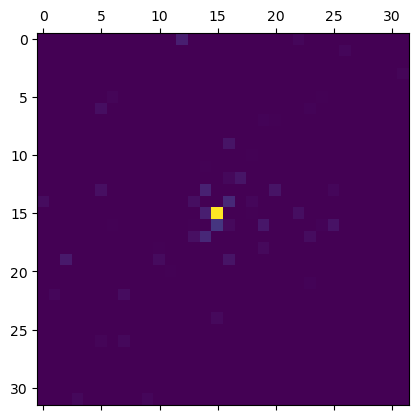

In [11]:
plt.matshow(dataset_x[0])
dataset_y[0]

In [12]:
x_train, x_test, y_train, y_test = \
        train_test_split(dataset_x, dataset_y, test_size=0.2, random_state=None)


In [13]:
y_train_0_categorical = np.array(y_train[:,0]).reshape(-1, 1)
y_test_0_categorical = np.array(y_test[:,0]).reshape(-1, 1)

encoder = OneHotEncoder(sparse_output=False)
y_train_0_categorical_encoded = encoder.fit_transform(y_train_0_categorical)
y_test_0_categorical_encoded = encoder.transform(y_test_0_categorical)
y_test_0_categorical_encoded

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.

In [14]:
# Convert the second column of y to float32
y_train_12 = y_train[:, 1:].astype(np.float32)
y_test_12= y_test[:, 1:].astype(np.float32)
type(y_train_12)
y_train_12
y_train_12[1,:]

array([0.4, 2.5], dtype=float32)

In [46]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Assuming 'input_shape' is the shape of each input in dataset.x (e.g., (32, 32))
input_shape=(32,32)
# Define the model for eloss prediction
eloss_model = models.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(2, activation='sigmoid')  # Assuming two classes: 'MMAT' and 'MLBT'
])

# Compile the eloss model
eloss_model.compile(optimizer='adam',
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

# Train the eloss model using dataset.x and the first column of dataset.y

# Repeat the same process for alpha_s prediction
alpha_s_model = models.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(3, activation='softmax')  # Assuming three classes: 0.2, 0.3, 0.4
])

alpha_s_model.compile(optimizer='adam',
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

# # Train the alpha_s model using dataset.x and the second column of dataset.y

# Repeat for the third column
q_0_model = models.Sequential([
    layers.Flatten(input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(4, activation='softmax')  # Assuming four classes for the third column
])

q_0_model.compile(optimizer='adam',
                           loss='sparse_categorical_crossentropy',
                           metrics=['accuracy'])

# # Train the third column model using dataset.x and the third column of dataset.y


In [47]:
# Assuming you have split your data into training and testing sets (X_train, X_test, y_train, y_test)

# Train eloss model
eloss_model.fit(x_train, y_train_0_categorical_encoded, epochs=10)
# eloss_model.fit(x_train, y_train[:, 0], epochs=10, batch_size=32, validation_data=(x_test, y_test[:, 0]))

# Train alpha_s model
alpha_s_model.fit(x_train, y_train_12[:,0], epochs=10)

# Train q_0 model
q_0_model.fit(x_train, y_train_12[:, 1], epochs=10)


Epoch 1/10
25/25 [==============================] - 1s 3ms/step - loss: 0.7510 - accuracy: 0.5200
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: 0.5885 - accuracy: 0.7262
Epoch 3/10
25/25 [==============================] - 0s 4ms/step - loss: 0.5039 - accuracy: 0.7900
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 0.4294 - accuracy: 0.8525
Epoch 5/10
25/25 [==============================] - 0s 4ms/step - loss: 0.3654 - accuracy: 0.8875
Epoch 6/10
25/25 [==============================] - 0s 8ms/step - loss: 0.2951 - accuracy: 0.9225
Epoch 7/10
25/25 [==============================] - 0s 5ms/step - loss: 0.2350 - accuracy: 0.9450
Epoch 8/10
25/25 [==============================] - 0s 4ms/step - loss: 0.1841 - accuracy: 0.9638
Epoch 9/10
25/25 [==============================] - 0s 5ms/step - loss: 0.1435 - accuracy: 0.9775
Epoch 10/10
25/25 [==============================] - 0s 4ms/step - loss: 0.1100 - accuracy: 0.9887
Epoch 1/10
25/25 [=